<span><center><h1> Free Fall from an Airplane </h1></center></span>

# Introduction

## Topic of Study

We would like to model the free fall of a body from an airplane. Free in free fall means that nothing is pushing the body upward, except the dragging force of the air.

Our referential for the velocities and the positions will be the ground. Imagine that you are on the ground and looking at the motion of planes and skydivers with respect to you.

We will suppose in what follows, that the airplane moves at a constant velocity $\overrightarrow{v}_0$. On top of that, the wind blows at a velocity $\overrightarrow{v}_w$. We will suppose that $\overrightarrow{v}_0$ and $\overrightarrow{v}_w$ are colinear (on the same line) --- but could in the same or opposite direction --- and parallel to the ground.

First, we will neglect the surface of the body exposed to the air. It comes down to neglecting drag.

In a second time, we will add the surface in our model and we will compare with our dragless model.

Finaly we will conduct a case study and their impact on the flight:

- modification of the surface exposed to the wind (e.g. parachute opening) 

- modification of the body position at the exit of the plane

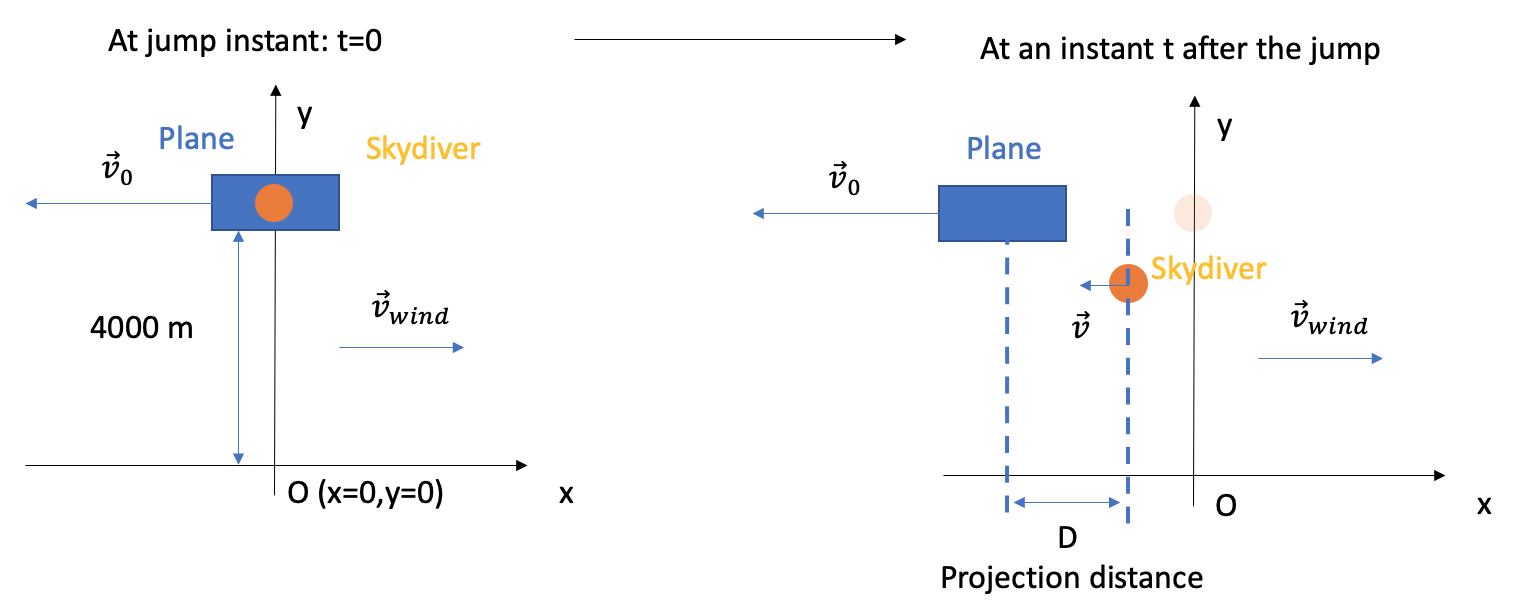

## Python Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import bokeh

## Main Parameters

In [5]:
# ground airplane speed
v_0 = 148.16 * 1e3 / 3600 # 80 kt converted in m/s
# ground wind speed
v_w = 0
# gravitational acceleration
g = 9.81 # m.s^-2
# drop altitude
y_0 = 4000 # m (with respect to the gound)
# skydiver mass
m = 70 # kg 
# air volumic mass
rho = 1 # kg.m^3 env. 1.292 at sea level and 0.99 at 2200 m

# Dragless freefall

## Equation of the problem

The only force exerted upon the skydiver is the gravitational pull of the Earth $m \overrightarrow{g}$, oriented toward the bottom.

Newton's Second Law gives us the following equaiton:

$$
m \frac{d\overrightarrow{v}}{dt} = m\overrightarrow{g}
$$

The projection along (O$x$) yields:

$$
m \frac{d v_x}{dt} = 0  \qquad (1)
$$ 

And the projection along (O$y$) yields:

$$
m \frac{d v_y}{dt} = -mg \qquad (2)
$$

## Solution

Equation (1) has for solution:

$$
\begin{align}
v_x &= v_{x0} \\
x &= v_{x0} \,t + x_0
\end{align}
$$

Equation (2) has for solution:

$$
\begin{align}
v_y &= v_{y0} \\
y &= -\frac{g\,t^2}{2} + v_{y0} \,t + y_0
\end{align}
$$


Our initial conditions were:

$$
\begin{align}
v_y &= 0 \\
y_0 &= 4000 \\
v_x &= v_\mathrm{a} + v_\mathrm{wind} \\
x_0 &= 0 
\end{align}
$$

Therefore we get for $x$ and $y$ the following solutions:

$$
\begin{align}
x &= (v_\mathrm{a} + v_\mathrm{wind}) \, t \\
y &= -\frac{g\,t^2}{2} + 4000
\end{align}
$$

## Time of Fall

The ground is reached when $y=0$, this conditions allows to find the time of fall $t_c$:

$$
t_c = \left(\frac{2 \times y_0}{g} \right)^{1/2} = \left(\frac{2 \times 4000}{9,81} \right)^{1/2}
$$

In [6]:
t_c = (2*y_0/g)**0.5
print(f"t_c: {t_c:.2f}", "(s)")

t_c: 28.56 (s)


## Distance of projection (no course correction)

During tha time, the skydiver moves parallel to the ground. Once again, we neglec the drag. In a realistic case, we would be greatly damped at the exist of the plane.

$x(t_c) = (v_\mathrm{0} + v_\mathrm{w}) \, t_c = (80 kt + 0 kt) \,  t_c$

In [7]:
print(f"(t_c): {(v_0+v_w)*t_c/1e3:.2f}", "(km)")

(t_c): 1.18 (km)


## Conclusion

Without drag, a skydiver would take 28.5 seconds to reach the ground and would be sent at a distance 1.18 km from the drop point along the same direction as the one taken by the plane.

## Trajectoire (plot)

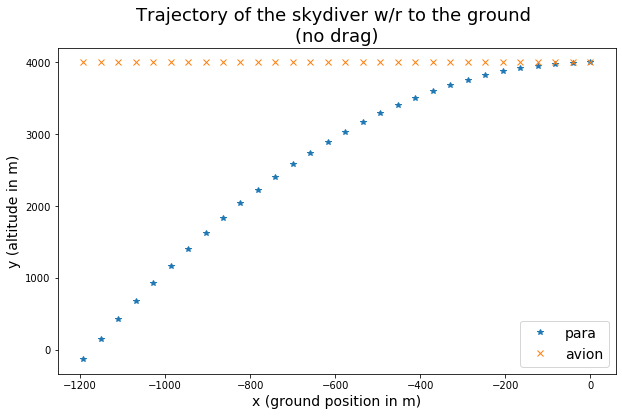

In [8]:
t = np.arange(0,30)
x = -(v_0 + v_w)*t
y = - g*t**2/2+y_0

fontsize = 14
titlefontsize = 18
plt.figure(figsize=(10,6))
plt.plot(x,y, "*", label="para")
plt.plot(x, y*0+y_0,"x", label="avion")
plt.legend(fontsize=fontsize)
plt.xlabel("x (ground position in m)", fontsize=fontsize)
plt.ylabel("y (altitude in m)", fontsize=fontsize)
plt.title("Trajectory of the skydiver w/r to the ground \n(no drag)", fontsize=titlefontsize)
plt.show()


# Free Fall with Drag

## Equation of the problem

The dragging force (or friction) is provided by:

$$
F_f= - \frac{1}{2}\rho v^2 S
$$

where $\rho$ is the volumic mass of the moved fluid, $v$ is the velocity and $S$ is the area of the object going through the fluid (i.e. the skydiver). This force is applied in the opposite direction to the motion.

Normally, we should include a $C$ coefficiant, which depends on the shape et and the roughness of the surface of the object plunged inside the fluide. We will assume here that $S$ contains already this quantity in order to simply the equation.

$$
    C \, S \longrightarrow S
$$

This modifies Newton's Lax into:

$$
m \frac{d\overrightarrow{v}}{dt} = m\overrightarrow{g} - \frac{1}{2}\rho v S \overrightarrow{v}
$$

The projection along (O$x$) gives:

$$
m \frac{d v_x}{dt} = - \frac{1}{2}\rho S_x v_x^2  \qquad (3)
$$ 

and the projection along (O$y$) give:

$$
m \frac{d v_y}{dt} = -mg + \frac{1}{2}\rho S_y v_y^2 \qquad (4)
$$



## Solution

### Along (Ox) (équation 3)

We can rewrite equation (3) under the form:

$$
\frac{1}{v_x^2} \frac{d v_x}{dt}  = - \frac{1}{2} \frac{\rho S_x}{m}
$$

Which gives for $v_x$ :

$$
- \frac{1}{v_x} + \frac{1}{v_{x0}}   = - \frac{1}{2} \frac{\rho S_x}{m} t \Longrightarrow v_x = \dfrac{2 m v_{x0}}{\rho S_x v_{x0} \, t + 2 m}
$$

The position $x$ is obtainable by integrating a second time:

$$
 x = \frac{2m}{\rho S_x} \ln\left(\frac{\rho S_x v_{x0} \, t + 2 m}{2 m}\right) + x_0
$$

and with the initial condition $x_0 = 0$, we get:

$$
 x = \frac{2m}{\rho S_x} \ln\left(\frac{\rho S_x v_{x0} \, t + 2 m}{2 m}\right)
$$

### Numerical application and plot

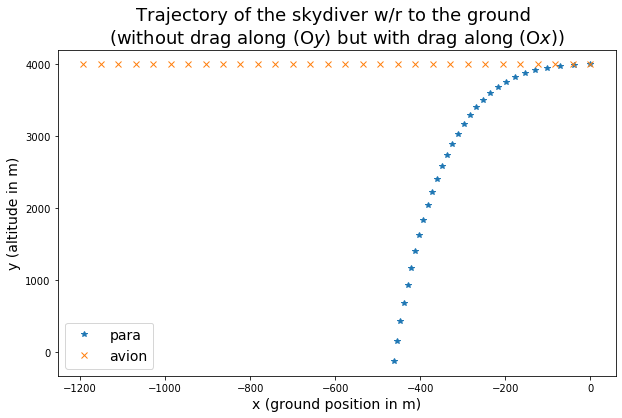

In [9]:
#
C_x = 1.2 # homme debout
S_x = C_x * 0.42 # m^2 (surface initiale du parachutiste selon Ox)
a = 2*m/rho/S_x
v_x0 = v_0 + v_w 
x2 = a*np.log((rho*S_x*v_x0*t + 2*m)/(2*m))

#plt.plot(t,-x)
#plt.plot(t,x2)

fontsize = 14
titlefontsize = 18
plt.figure(figsize=(10,6))
plt.plot(-x2, y, "*", label="para")
plt.plot(x, y*0+y_0,"x", label="avion")
plt.legend(fontsize=fontsize)
plt.xlabel("x (ground position in m)", fontsize=fontsize)
plt.ylabel("y (altitude in m)", fontsize=fontsize)
plt.title("Trajectory of the skydiver w/r to the ground \n(without drag along (O$y$) but with drag along (O$x$))", fontsize=titlefontsize)
plt.show()

### x(t) and v$_x$(t)

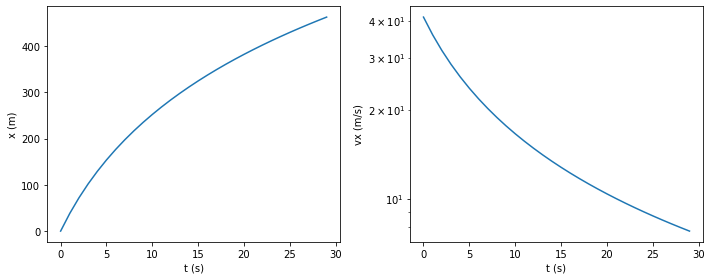

In [10]:
v_x2 = 2*m*v_x0/(rho*S_x*v_x0*t+2*m)

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(t, x2)
ax1.set_xlabel("t (s)")
ax1.set_ylabel("x (m)")


ax2 = fig.add_subplot(1,2,2)
ax2.plot(t, v_x2)
ax2.set_xlabel("t (s)")
ax2.set_ylabel("vx (m/s)")
ax2.set_yscale("log")

fig.tight_layout()
plt.show()

### Conclusion along Ox

We are stopped very quickly when exiting the plane due to the drag.

## Along (Oy) (equation 4)

Equation (4) was:

$$
m \frac{d v_y}{dt} = -mg + \frac{1}{2}\rho S_y v_y^2 \qquad (4)
$$

This equation is more difficult to solve due to the gravity term.

First of all, we can look at the limit case where the speed would not increase anymore. It seems to be an intuitive idea since the drag is there to help reach this state.

This amounts to write the following:

$$
\frac{d v_y}{dt} = 0 \Longrightarrow 0 = - m g + \frac{1}{2} \rho S_y v_y^2
$$

We then get the limit speed $v_\mathrm{lim}$:

$$
v_\mathrm{lim} = \left(\frac{2 m g}{\rho S_y} \right)^{1/2}
$$

It is the maximal attainable speed given the drag.

Let's introduce this quantity into equation (4) :

$$
 \frac{d v_y}{dt} = g \left( - 1  + \left(\frac{v_y}{v_\mathrm{lim}} \right)^2 \right)
$$

Now, let's normalize this equation by rescaling the variable of velocity and time into nondimensional units. We write:

$$
\begin{align}
\widetilde{v}_y &=  \frac{v_y}{v_\mathrm{lim}} \\
\widetilde{t} &=  \frac{g\,t}{v_\mathrm{lim}} =  \frac{t}{\tau} 
\end{align}
$$

and we defined $\tau = \dfrac{v_\mathrm{lim}}{g}$.

This gives:

$$
 \frac{d \widetilde{v}_y}{d\widetilde{t}} = - 1  + \widetilde{v}_y^2 \qquad (5)
$$


### Solving the equation (5)

They are two equivalent ways of solving equation (5).

One is by recognizing the derivative of $\tanh(x)$: $\frac{d \tanh{x}}{d x} = 1 - \tanh^2{x}$, the other is by direct integration after dividing both sides by the right term.

The equivalence comes through the fact that $\mathrm{acrtanh}$ can be expressed using $\ln$ as follows:

$$
\mathrm{acrtanh}(x) = \frac{1}{2} \ln \left( \frac{1+x}{1-x} \right) \quad \mathrm{for} \quad x \in \, ]-1,1[ \,\, \mathrm{or} \,\, ]-\infty, -1] \cup [1, \infty[
$$

This result can be derived by integrating the derivative of $\mathrm{acrtanh}(\tanh(x))$.

#### Solution 1

For hyperbolic tangent, we know that:

$$
 \frac{d \tanh{x}}{d x} = 1 - \tanh^2{x}
$$

In order to use it in equation (5),  let's change the variable $ f =-\widetilde{v}_y$ in order to get:

$$
\frac{d f}{d\widetilde{t}} =  1  - f^2 
$$

Therefore, we can integrate:

$$
\begin{align}
\int_0^{\widetilde{t}} \frac{f'}{1-f^2} dt &= \int_0^{\widetilde{t}} 1 dt\\
\int_{\mathrm{arctanh}(f(0))}^{\mathrm{arctanh}(f(\widetilde{t}))} d\tanh(x) &= \widetilde{t} \\
\mathrm{arctanh}(f(\widetilde{t})) - \mathrm{arctanh}(f(0)) &= \widetilde{t} \\
\mathrm{arctanh}\left(\dfrac{f(\widetilde{t}) - f_0}{1-f(\widetilde{t})f_0}\right) &= \widetilde{t} \qquad \mathrm{writting} \quad f_0 = f(0) 
\end{align}
$$

And, using $\mathrm{arctanh}(a) - \mathrm{arctanh}(b) = \mathrm{arctanh}\left(\dfrac{a-b}{1-ab}\right)$:

By solving for $f$, after some computations, we find:

$$
f(\widetilde{t}) = \dfrac{\tanh(\widetilde{t}) + f_0}{1+f_0 \tanh(\widetilde{t})} \qquad \widetilde{t} \in \, ]-1,1[ \,\, \mathrm{or} \,\, ]-\infty, -1] \cup [1, \infty[
$$

Now, let's reverse course and unfold everything:

$$
\widetilde{v}_y  = - \dfrac{\tanh(\widetilde{t}) - \widetilde{v}_{y0}}{1 - \widetilde{v}_{y0}\tanh(\widetilde{t})} =  \dfrac{\widetilde{v}_{y0}- \tanh(\widetilde{t})}{1 - \widetilde{v}_{y0}\tanh(\widetilde{t})} 
$$

Finally:

$$
v_y (t) =  \dfrac{v_{y0} - v_\mathrm{lim} \tanh\left(\dfrac{t}{\tau}\right)}{1 - \dfrac{v_{y0}}{v_\mathrm{lim}}\tanh\left(\dfrac{t}{\tau}\right)} 
$$

_Remark_

_a primitive of $\tanh{x}$ is $\ln(\cosh(x))$, and a primitive of $\dfrac{1}{\tanh{x}}$ is $\ln(\sinh(x))$_

For the position, we get:

$$
y(t)=\begin{cases}
      - v_\mathrm{lim} \tau \, \ln\left(\cosh \left(\frac{t}{\tau}\right)\right) + y_0 & \mathrm{if} \, v_{y0}=0\\
      - v_\mathrm{lim} \tau \, \ln\left(\frac{v_\mathrm{lim}}{v_{y0}} \cosh \left(\frac{t}{\tau}\right) - \sinh \left(\frac{t}{\tau}\right)\right) + y_0 & \mathrm{if} \, v_{y0} \neq 0
      \end{cases}
$$

Then, we can suppose that the initial velocity was nul, and that gives:

$$
\begin{align}
v_y (t) &= - v_\mathrm{lim} \tanh \left(\frac{t}{\tau}\right) \\
y(t) &= - v_\mathrm{lim} \tau \, \ln\left(\cosh \left(\frac{t}{\tau}\right)\right) + y_0
\end{align}
$$

It is also possible to rewrite $\ln(\cosh(x))$ into $x + \ln \left( \dfrac{1+e^{-2x}}{2} \right)$ which gives for the position:

$$
y(t) = - v_\mathrm{lim} \, t - v_\mathrm{lim} \tau \, \ln\left[\frac{1}{2}\left( 1+\exp\left(-2\dfrac{t}{\tau}\right) \right)\right] + y_0
$$

#### Solution 2


It is possible to directly integrate the problem by seperating $\frac{1}{- 1  + \widetilde{v}_y^2}$ into simple components.

The equation (5) becomes:

$$
 \frac{1}{- 1  + \widetilde{v}_y^2} d \widetilde{v}_y =  d\widetilde{t} \qquad (5 bis)
$$

and 

$$
\frac{-1}{1  - \widetilde{v}_y^2} = \frac{-1}{2} \left( \frac{1}{1-\widetilde{v}_y}+\frac{1}{1+\widetilde{v}_y} \right) = \frac{1}{2} \left( \frac{-1}{1-\widetilde{v}_y}-\frac{1}{1+\widetilde{v}_y} \right) \qquad (6)
$$

Direct integration of (5 bis) using (6) thus yields:

$$
\frac{1}{2} \left[ \ln\left(\left| \frac{1-\widetilde{v}}{1-\widetilde{v}_0} \right| \right) - \ln\left(\left| \frac{1+\widetilde{v}}{1+\widetilde{v}_0} \right| \right)  \right] = \widetilde{t}-\widetilde{t}_0
$$

Supposing $\widetilde{v} \in ]-1, 0]$, we then have:

$$
\widetilde{v}(\widetilde{t}) = \frac{-1+Ke^{-2\Delta \widetilde{t}}}{1+Ke^{-2\Delta \widetilde{t}}}
$$

with $K = \dfrac{1 + \widetilde{v}_0}{1- \widetilde{v}_0}$ and $\Delta \widetilde{t} = \widetilde{t} - \widetilde{t}_0$.

Finally, coming back to original problem:

$$
v(t) = \dfrac{-1+Ke^{-2\left(\dfrac{t-t_0}{\tau}\right)}}{1+Ke^{-2\left(\dfrac{t-t_0}{\tau}\right)}}
$$

with $K = \dfrac{v_\mathrm{lim} + v_0}{v_\mathrm{lim} -
v_0}$

#### Comparison of solution 1 and 2

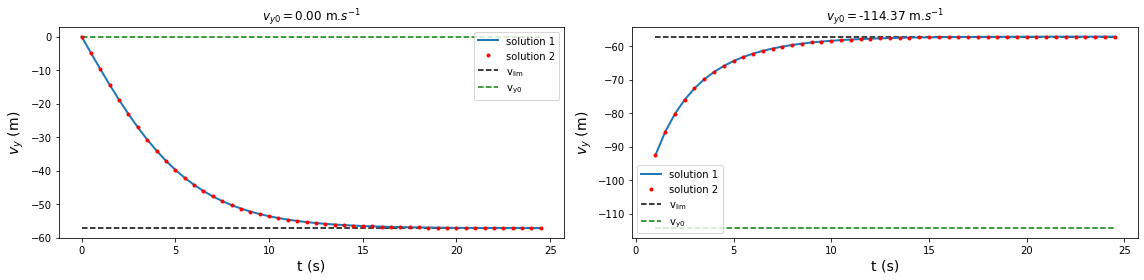

In [18]:
C_y = 1 # (human body)
S_y = C_y*0.42 # m^2 (surface parachutiste parachute non déployé)
v_lim = (2*m*g/rho/S_y)**0.5
tau = v_lim / g

v_y0 = 0 #v_lim*2
t2 = np.arange(0,25,0.5)
v_y2_sol1 = (v_y0-v_lim*np.tanh(t2/tau)) / (1-v_y0/v_lim*np.tanh(t2/tau))
K = (v_lim+v_y0)/(v_lim-v_y0)
v_y2_sol2 = v_lim*(-1+K*np.exp(-2*t2/tau))/(1+K*np.exp(-2*t2/tau))

fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(t2, v_y2_sol1, linewidth = 2, label="solution 1")
ax1.plot(t2, v_y2_sol2,".",linewidth = 2, color="red", label="solution 2")
ax1.set_xlabel("t (s)", fontsize=fontsize)
ax1.set_ylabel("$v_y$ (m)", fontsize=fontsize)
ax1.set_title("$v_{y0}=$"+f"{v_y0:.2f}"+" m.$s^{-1}$")
ax1.hlines(-v_lim, t2[0], t2[-1],linestyle="dashed", label="v$_\mathrm{lim}$")
ax1.hlines(v_y0, t2[0], t2[-1], color="green", linestyle="dashed", label="v$_{\mathrm{y}0}$")
plt.legend()

v_y0 = -2*v_lim
t2 = np.arange(1,25, 0.5)
v_y2_sol1 = (v_y0-v_lim*np.tanh(t2/tau)) / (1-v_y0/v_lim*np.tanh(t2/tau))
K = (v_lim + v_y0)/(v_lim-v_y0)
v_y2_sol2 = v_lim*(-1+K*np.exp(-2*t2/tau))/(1+K*np.exp(-2*t2/tau))

ax2 = fig.add_subplot(1,2,2)
ax2.plot(t2, v_y2_sol1, linewidth = 2, label="solution 1")
ax2.plot(t2, v_y2_sol2,".",linewidth = 2, color="red", label="solution 2")
ax2.set_xlabel("t (s)", fontsize=fontsize)
ax2.set_ylabel("$v_y$ (m)", fontsize=fontsize)
ax2.set_title("$v_{y0}=$"+f"{v_y0:.2f}"+" m.$s^{-1}$")
ax2.hlines(-v_lim, t2[0], t2[-1], linestyle="dashed", label="v$_\mathrm{lim}$")
ax2.hlines(v_y0, t2[0], t2[-1], color="green", linestyle="dashed", label="v$_{\mathrm{y}0}$")
plt.legend()
fig.tight_layout()
plt.show()

**Observation**:

The solutions perfectly overlap.

### Time of Fall

We are looking for $t_c$ such as $y(t_c)=0$.

In order to simplify the computation, we can suppose that the solution is greater than $\tau$. Since $\exp(-2)\approx 0.135$, we can thus neglect the exponential term compared to 1, which yields:

$$
0 = - v_\mathrm{lim} \, t_c - v_\mathrm{lim} \tau \, \ln\left[\frac{1}{2}\right] + y_0 \Rightarrow t_c = - \tau \, \ln\left[\frac{1}{2}\right] + \frac{y_0}{v_\mathrm{lim}} 
$$

In [219]:
C_y = 1 # (human body)
S_y = C_y*0.42 # m^2 (surface parachutiste parachute non déployé)
v_lim = (2*m*g/rho/S_y)**0.5
tau = v_lim / g

print("tau:", f"{tau:.2f} (s)")

print("Terminal velocity:", f"{v_lim:.2f} (m/s)")
print("Terminal velocity:", f"{v_lim*3.6:.2f} (km/h)")

t_c2 = -tau*np.log(0.5)+y_0/v_lim
print("t_c:", f"{t_c2:.2f} (s)")

tau: 5.83 (s)
Terminal velocity: 57.18 (m/s)
Terminal velocity: 205.86 (km/h)
t_c: 73.99 (s)


We verify that indeed $t_c$ is much greater than $\tau$.

Now, how much time does it take to reach 1000 m, the altitude at which we should deploy our parachute ?

$$
t_{1000} = - \tau \, \ln\left[\frac{1}{2}\right] + \frac{(y_0-1000)}{v_\mathrm{lim}} 
$$

In [243]:
t_1000 = -tau*np.log(0.5)+(y_0-1000)/v_lim
print("t_1000:", f"{t_1000:.2f} (s)")
t_1000 = -tau*np.log(0.5)+(y_0-1000)/v_lim
print("t_1000:", f"{t_1000:.2f} (s)")

t_1000: 56.50 (s)
t_1000: 56.50 (s)


After 56 seconds of freefall, it would be a good idea to open the parachute!


### y(t) and v$_y$(t)

$$
\begin{align}
v_y (t) &= - v_\mathrm{lim} \tanh \left(\frac{t}{\tau}\right) \\
y(t) &= - v_\mathrm{lim} \, t - v_\mathrm{lim} \tau \, \ln\left[\frac{1}{2}\left( 1+\exp\left(-2\dfrac{t}{\tau}\right) \right)\right] + y_0
\end{align}
$$

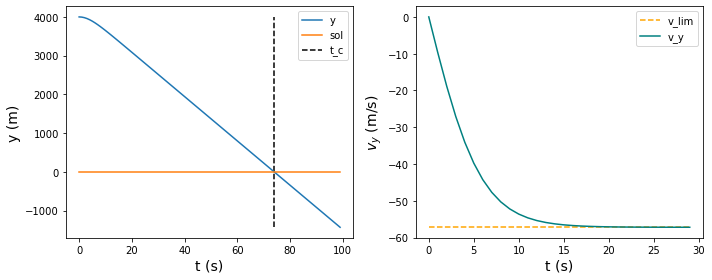

In [217]:
v_y2 = -v_lim*np.tanh(g*t/v_lim)

t2 = np.arange(0,100)
#y2 = - v_lim * tau * np.log(np.cosh(t3/tau)) + y_0
y2 = - v_lim * t2 - v_lim * tau * np.log((1+np.exp(-2*t2/tau))/2) + y_0

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(t2, y2, label="y")
ax1.plot(t2, y2*0, label="sol")
ax1.vlines(t_c2, y2[-1], y_0, linestyle="dashed", label=f"t_c")
ax1.set_xlabel("t (s)", fontsize=fontsize)
ax1.set_ylabel("y (m)", fontsize=fontsize)
plt.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.plot(t, -np.ones_like(t)*v_lim, "--", label="v_lim", color="orange")
ax2.plot(t, v_y2, label="v_y", color="teal")
ax2.set_xlabel("t (s)", fontsize=fontsize)
ax2.set_ylabel("$v_y$ (m/s)", fontsize=fontsize)
plt.legend()

fig.tight_layout()
plt.show()

### Conclusion for (Oy)

The addition of vertical drag, while suposing the body flat and perpendiculaire to the direciton of the fall, increases the time of gall from 28.5 s to 74 s for 70 kg skydiver (gear included). 

The limit speed is about 200 km/h and is reached within 15 seconds of falling.

>Unlike the first time, the limite velocity depends on the person's mass (proprotional to the square root). Same for the time of fall which is inversly proportional to the square root of the person's mass. The heavier the person, the faster she will fall for she will be less slown down by the dragging of the air.


## Trajectories

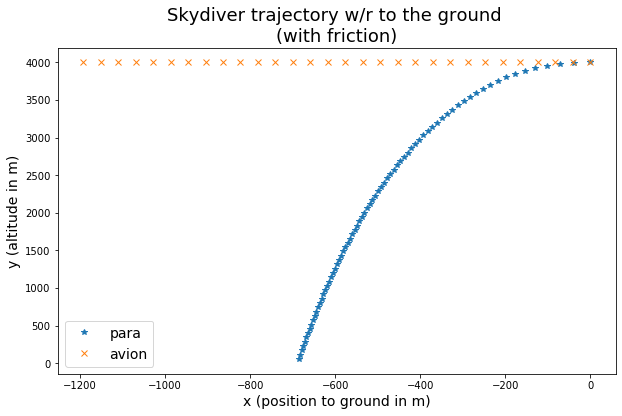

In [245]:
t = np.arange(0,30)
x = -(v_a + v_vent)*t
y = - g*t**2/2+y_0

t2 = np.arange(0,t_c2)
y2 = - v_lim * t2 - v_lim * tau * np.log((1+np.exp(-2*t2/tau))/2) + y_0
x2 = a*np.log((rho*S_x*v_x0*t2 + 2*m)/(2*m))

fontsize = 14
titlefontsize = 18
plt.figure(figsize=(10,6))
plt.plot(-x2,y2, "*", label="para")
plt.plot(x, y*0+y_0,"x", label="avion")
plt.legend(fontsize=fontsize)
plt.xlabel("x (position to ground in m)", fontsize=fontsize)
plt.ylabel("y (altitude in m)", fontsize=fontsize)
plt.title("Skydiver trajectory w/r to the ground \n(with friction)", fontsize=titlefontsize)
plt.show()


# Study of the fall parameters

## Breaking down the flight phases des phases de vol

For now, refer to the [Skydiving simulator]() to explore the different cases.

# Sources

https://www.grc.nasa.gov/www/k-12/VirtualAero/BottleRocket/airplane/rktvrecv.html

http://mecaspa.cannes-aero-patrimoine.net/PROJETS/ATMOSPHE/rentmars.htm

https://en.wikipedia.org/wiki/Parachuting

https://fr.wikipedia.org/wiki/Physique_du_parachutisme
